In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('all_seasons.csv')
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
df = df.drop(columns=['Unnamed: 0', 'college', 'country', 'draft_year', 'draft_round', 'draft_number'])
df['season'] = (df['season'].str[:2] + df['season'].str[-2:]).fillna(0).astype(int)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1997
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1997
2,George Lynch,VAN,26.0,203.20,103.418976,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1997
3,George McCloud,LAL,30.0,203.20,102.058200,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1997
4,George Zidek,DEN,23.0,213.36,119.748288,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1997


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   gp                 12844 non-null  int64  
 6   pts                12844 non-null  float64
 7   reb                12844 non-null  float64
 8   ast                12844 non-null  float64
 9   net_rating         12844 non-null  float64
 10  oreb_pct           12844 non-null  float64
 11  dreb_pct           12844 non-null  float64
 12  usg_pct            12844 non-null  float64
 13  ts_pct             12844 non-null  float64
 14  ast_pct            12844 non-null  float64
 15  season             12844 non-null  int64  
dtypes: float64(12), int64(

In [5]:
print(df.max())

player_name          Zylan Cheatham
team_abbreviation               WAS
age                            44.0
player_height                231.14
player_weight             163.29312
gp                               85
pts                            36.1
reb                            16.3
ast                            11.7
net_rating                    300.0
oreb_pct                        1.0
dreb_pct                        1.0
usg_pct                         1.0
ts_pct                          1.5
ast_pct                         1.0
season                         2023
dtype: object


In [6]:
df = df[df['season'] == 2023]
df.drop(columns=['season'], inplace=True)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
12305,Quentin Grimes,NYK,23.0,195.58,95.254320,71,11.3,3.2,2.1,4.4,0.022,0.085,0.142,0.619,0.096
12306,Quenton Jackson,WAS,24.0,195.58,78.471416,9,6.2,0.9,1.7,-6.7,0.014,0.044,0.164,0.542,0.155
12307,Pat Connaughton,MIL,30.0,195.58,94.800728,61,7.6,4.6,1.3,3.4,0.033,0.144,0.133,0.531,0.069
12308,RJ Barrett,NYK,23.0,198.12,97.068688,73,19.6,5.0,2.8,-1.2,0.023,0.121,0.256,0.531,0.124
12309,Precious Achiuwa,TOR,23.0,203.20,102.058200,55,9.2,6.0,0.9,-1.6,0.083,0.213,0.190,0.554,0.063


In [7]:
scaler = StandardScaler()
df[['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating']] = scaler.fit_transform(df[['age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating']])
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
12305,Quentin Grimes,NYK,-0.729384,-0.451586,-0.235477,0.932246,0.318711,-0.146379,0.016140,0.477981,0.022,0.085,0.142,0.619,0.096
12306,Quenton Jackson,WAS,-0.497854,-0.451586,-1.770660,-1.585233,-0.427354,-1.127277,-0.190989,-0.412923,0.014,0.044,0.164,0.542,0.155
12307,Pat Connaughton,MIL,0.891326,-0.451586,-0.276969,0.526201,-0.222552,0.450689,-0.398119,0.397720,0.033,0.144,0.133,0.531,0.069
12308,RJ Barrett,NYK,-0.729384,-0.140327,-0.069512,1.013455,1.532895,0.621280,0.378616,0.028516,0.023,0.121,0.256,0.531,0.124
12309,Precious Achiuwa,TOR,-0.729384,0.482192,0.386894,0.282574,0.011508,1.047758,-0.605248,-0.003589,0.083,0.213,0.190,0.554,0.063


In [8]:
player_team_df = df[['player_name', 'team_abbreviation']]
df = df.drop(columns=['player_name', 'team_abbreviation'])

In [9]:
def optimize_k_means(data, max_k):
  means = []
  inertias = []
  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

  fig = plt.subplots(figsize=(10, 5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.title('Elbow Method')
  plt.grid(True)
  plt.show()

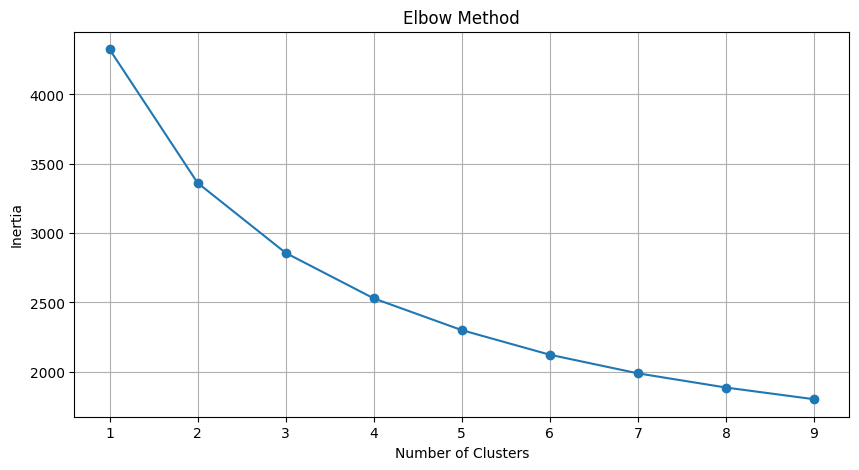

In [10]:
optimize_k_means(df, 10)

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
df['kmeans'] = kmeans.labels_
df = pd.concat([player_team_df, df], axis=1)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,kmeans
12305,Quentin Grimes,NYK,-0.729384,-0.451586,-0.235477,0.932246,0.318711,-0.146379,0.016140,0.477981,0.022,0.085,0.142,0.619,0.096,0
12306,Quenton Jackson,WAS,-0.497854,-0.451586,-1.770660,-1.585233,-0.427354,-1.127277,-0.190989,-0.412923,0.014,0.044,0.164,0.542,0.155,1
12307,Pat Connaughton,MIL,0.891326,-0.451586,-0.276969,0.526201,-0.222552,0.450689,-0.398119,0.397720,0.033,0.144,0.133,0.531,0.069,0
12308,RJ Barrett,NYK,-0.729384,-0.140327,-0.069512,1.013455,1.532895,0.621280,0.378616,0.028516,0.023,0.121,0.256,0.531,0.124,0
12309,Precious Achiuwa,TOR,-0.729384,0.482192,0.386894,0.282574,0.011508,1.047758,-0.605248,-0.003589,0.083,0.213,0.190,0.554,0.063,0


In [12]:
import mpl_toolkits.mplot3d.axes3d as p3

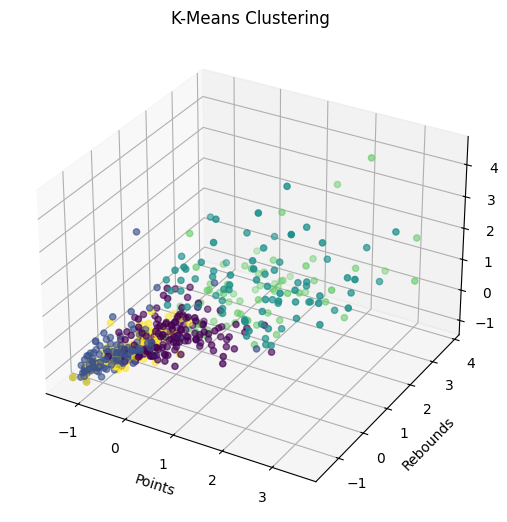

In [13]:
fig = plt.figure()
ax = p3.Axes3D(fig)
x_vals = df['pts']
y_vals = df['reb']
z_vals = df['ast']
ax.scatter(x_vals, y_vals, z_vals, c=df['kmeans'])
ax.set_xlabel('Points')
ax.set_ylabel('Rebounds')
ax.set_zlabel('Assists')
ax.set_title('K-Means Clustering')
fig.add_axes(ax)
plt.show()

In [14]:
group1 = df[df['kmeans'] == 0]['player_name'].tolist()
group2 = df[df['kmeans'] == 1]['player_name'].tolist()
group3 = df[df['kmeans'] == 2]['player_name'].tolist()
group4 = df[df['kmeans'] == 3]['player_name'].tolist()
group5 = df[df['kmeans'] == 4]['player_name'].tolist()